## Imports etc.


In [1]:
import sys
sys.path.insert(1, '/home/yannik/vssil')

import matplotlib.pyplot as plt
import pylab
import torch
from torchvision.io import read_video

from src.utils.kpt_utils import get_image_patches, kpts_2_img_coordinates
from contrastive_loss_test_data.test_data import load_sample_images
from contrastive_loss_test_data.test_keypoints import get_perfect_keypoints, get_bad_keypoints, get_random_keypoints

## Get test data

In [2]:
torch.manual_seed(123)

sample_size = 4
batch_size = 16

img_tensor = load_sample_images(sample_size=sample_size,
                                path="/home/yannik/vssil/contrastive_loss_test_data/990000.mp4").unsqueeze(0)
img_tensor = img_tensor.repeat((batch_size, 1, 1, 1, 1))
N, T, C, H, W = img_tensor.shape

time_window = 5
patch_size = (35, 35)

pos_range = max(int(time_window / 2), 1) if time_window > 1 else 0
center_index = int(patch_size[0] / 2)

step_matrix = torch.ones(patch_size + (2,))

step_w = 2 / W
step_h = 2 / H

for k in range(0, patch_size[0]):
    for l in range(0, patch_size[1]):
        step_matrix[k, l, 0] = (l - center_index) * step_w
        step_matrix[k, l, 1] = (k - center_index) * step_h

## Perfect key-points

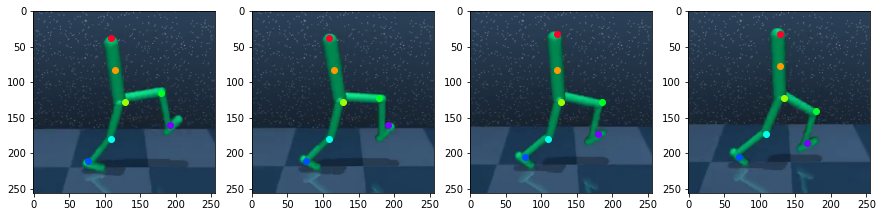

In [3]:
perfect_kpt_coordinates = get_perfect_keypoints(T=sample_size).unsqueeze(0)
perfect_kpt_coordinates = perfect_kpt_coordinates.repeat((batch_size, 1, 1, 1))
_, _, K, D = perfect_kpt_coordinates.shape

cm = pylab.get_cmap('gist_rainbow')
perfect_kpts = kpts_2_img_coordinates(perfect_kpt_coordinates, tuple(img_tensor.shape[-2:]))
fig, ax = plt.subplots(1, sample_size, figsize=(15, 5))
for t in range(sample_size):
    ax[t].imshow(img_tensor[0, t].permute(1, 2, 0))
    for k in range(K):
        ax[t].scatter(perfect_kpts[0, t, k, 0], perfect_kpts[0, t, k, 1], color=cm(1.*k/K))
plt.show()

torch.Size([16, 4, 3, 256, 256])
torch.Size([16, 4, 7, 3])
torch.Size([16, 4, 7, 3, 32, 32])


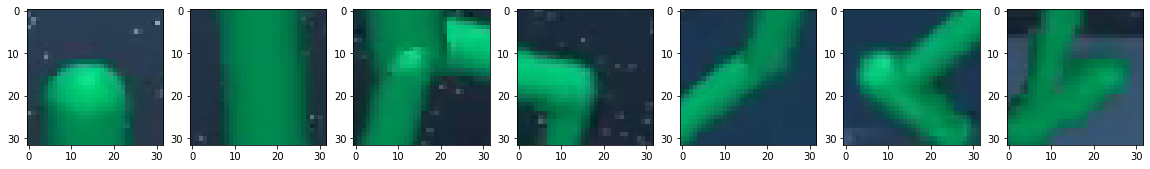

In [4]:
print(img_tensor.shape)  # (N, T, C, H, W)
print(perfect_kpt_coordinates.shape)  # (N, T, K, D)

perfect_kpt_patches = get_image_patches(image_sequence=img_tensor[0:1, ...],
                                        kpt_sequence=perfect_kpt_coordinates[0:1, ...],
                                        patch_size=(32, 32)).repeat((N, 1, 1, 1, 1, 1))

print(perfect_kpt_patches.shape)  # (N, T, K, C, H', W')

fig, ax = plt.subplots(1, K, figsize=(20, 10))
for k in range(K):
    ax[k].imshow(perfect_kpt_patches[0, 2, k, ...].permute(1, 2, 0).cpu().numpy())

## Worse key-points

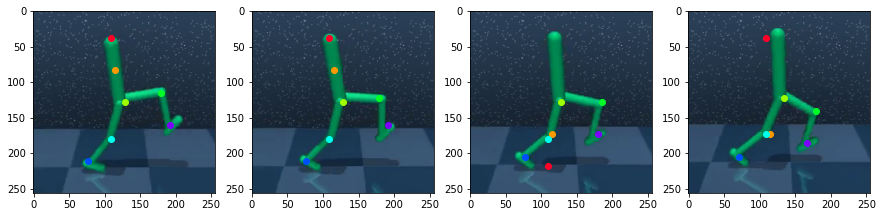

In [5]:
bad_kpt_coordinates = get_bad_keypoints(T=sample_size).unsqueeze(0)
bad_kpt_coordinates = bad_kpt_coordinates.repeat((batch_size, 1, 1, 1))
_, _, K, D = bad_kpt_coordinates.shape

cm = pylab.get_cmap('gist_rainbow')
bad_kpts = kpts_2_img_coordinates(bad_kpt_coordinates, tuple(img_tensor.shape[-2:]))
fig, ax = plt.subplots(1, sample_size, figsize=(15, 5))
for t in range(sample_size):
    ax[t].imshow(img_tensor[0, t].permute(1, 2, 0))
    for k in range(K):
        ax[t].scatter(bad_kpts[0, t, k, 0], bad_kpts[0, t, k, 1], color=cm(1.*k/K))
plt.show()

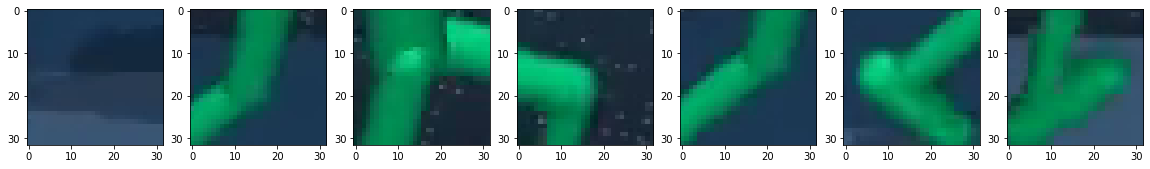

In [6]:
bad_kpt_patches = get_image_patches(image_sequence=img_tensor[0:1, ...],
                                        kpt_sequence=bad_kpt_coordinates[0:1, ...],
                                        patch_size=(32, 32)).repeat((N, 1, 1, 1, 1, 1))

fig, ax = plt.subplots(1, K, figsize=(20, 10))
for k in range(K):
    ax[k].imshow(bad_kpt_patches[0, 2, k, ...].permute(1, 2, 0).cpu().numpy())

## Random key-points

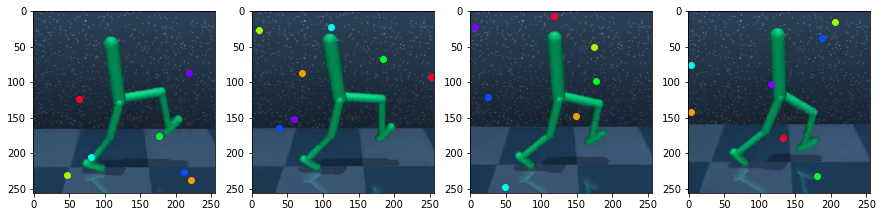

In [7]:
random_kpt_coordinates = get_random_keypoints(T=sample_size).unsqueeze(0)
random_kpt_coordinates = random_kpt_coordinates.repeat((batch_size, 1, 1, 1))
_, _, K, D = random_kpt_coordinates.shape

cm = pylab.get_cmap('gist_rainbow')
random_kpts = kpts_2_img_coordinates(random_kpt_coordinates, tuple(img_tensor.shape[-2:]))
fig, ax = plt.subplots(1, sample_size, figsize=(15, 5))
for t in range(sample_size):
    ax[t].imshow(img_tensor[0, t].permute(1, 2, 0))
    for k in range(K):
        ax[t].scatter(random_kpts[0, t, k, 0], random_kpts[0, t, k, 1], color=cm(1.*k/K))
plt.show()

torch.Size([16, 4, 7, 3])


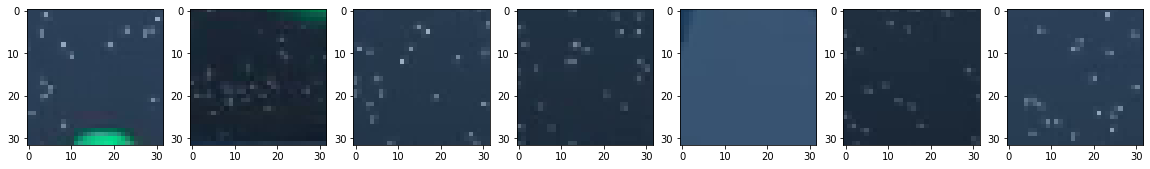

In [8]:
print(random_kpt_coordinates.shape)
random_kpt_patches = get_image_patches(image_sequence=img_tensor[0:1, ...],
                                        kpt_sequence=random_kpt_coordinates[0:1, ...],
                                        patch_size=(32, 32)).repeat((N, 1, 1, 1, 1, 1))

fig, ax = plt.subplots(1, K, figsize=(20, 10))
for k in range(K):
    ax[k].imshow(random_kpt_patches[0, 2, k, ...].permute(1, 2, 0).cpu().numpy())

## Plots

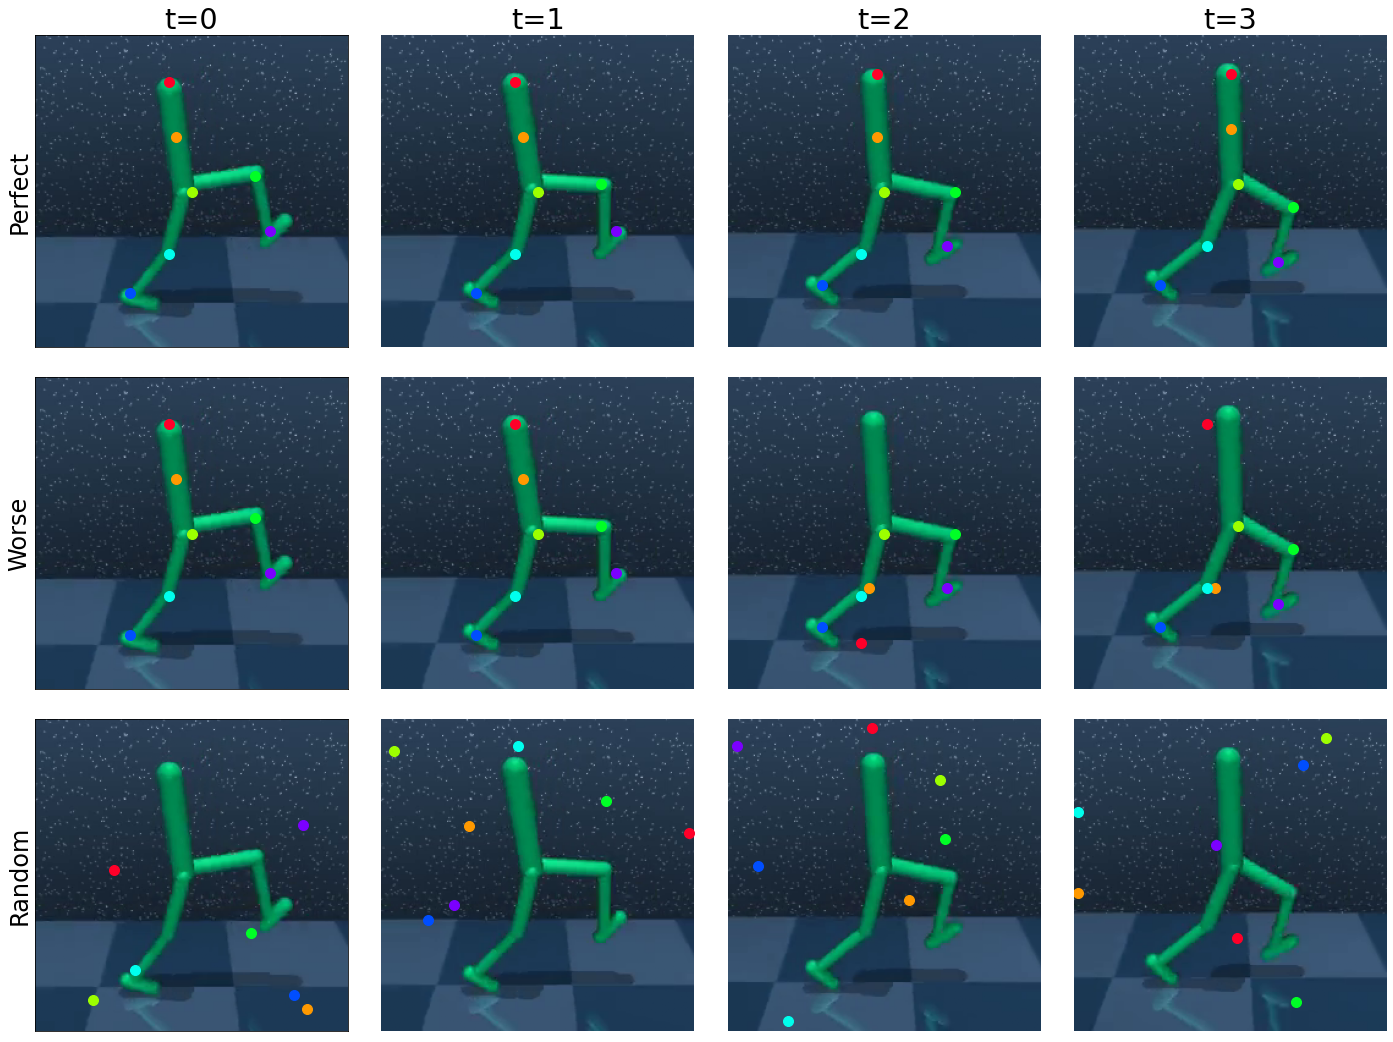

In [12]:
import matplotlib
import matplotlib.gridspec as gridspec

font = {'family' : 'Sans',
        'weight' : 'normal',
        # 'weight' : 'bold',
        # 'size'   : 38
        'size'   : 24}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for t in range(T):
    ax[0, t].axis('off')
    # ax[0, t].set_title(f"t={t}", weight='bold')
    ax[0, t].set_title(f"t={t}")
    ax[0, t].imshow(img_tensor[0, t].permute(1, 2, 0))
    ax[1, t].axis('off')
    ax[1, t].imshow(img_tensor[0, t].permute(1, 2, 0))
    ax[2, t].axis('off')
    ax[2, t].imshow(img_tensor[0, t].permute(1, 2, 0))
    for k in range(K):
        ax[0, t].scatter(perfect_kpts[0, t, k, 0],
                         perfect_kpts[0, t, k, 1],
                         color=cm(1.*k/K),
                         s=100
                        )
        ax[1, t].scatter(bad_kpts[0, t, k, 0],
                         bad_kpts[0, t, k, 1],
                         color=cm(1.*k/K),
                         s=100
                        )
        ax[2, t].scatter(random_kpts[0, t, k, 0],
                         random_kpts[0, t, k, 1],
                         color=cm(1.*k/K),
                         s=100
                        )
    if t == 0:
        ax[0, 0].axis('on')
        ax[0, 0].set_xticks([])
        ax[0, 0].set_yticks([])
        # ax[0, 0].set_ylabel('Perfect Keypoints')
        #ax[0, 0].set_ylabel('Perfect', weight='bold')
        ax[0, 0].set_ylabel('Perfect')
        ax[1, 0].axis('on')
        ax[1, 0].set_xticks([])
        ax[1, 0].set_yticks([])
        #ax[1, 0].set_ylabel('Worse Keypoints')
        #ax[1, 0].set_ylabel('Worse', weight='bold')
        ax[1, 0].set_ylabel('Worse')
        ax[2, 0].axis('on')
        ax[2, 0].set_xticks([])
        ax[2, 0].set_yticks([])
        #ax[2, 0].set_ylabel('Random Keypoints')
        ax[2, 0].set_ylabel('Random')
        #ax[2, 0].set_ylabel('Random', weight='bold')

        
plt.tight_layout()
plt.show()

fig.savefig('/home/yannik/walker_kpt_example.svg', bbox_inches='tight')

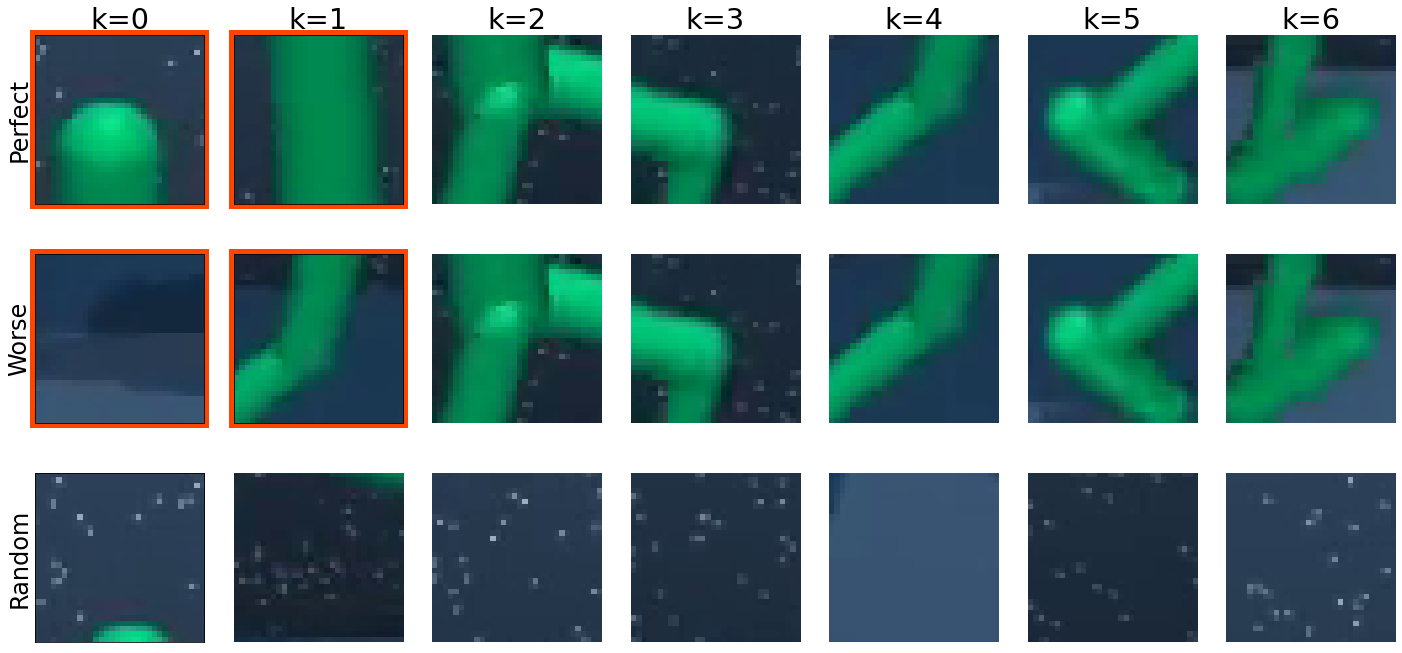

In [15]:
import matplotlib
import matplotlib.gridspec as gridspec

font = {'family' : 'Sans',
        'weight' : 'normal',
        # 'weight' : 'bold',
        # 'size'   : 38
        'size'   : 24}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(3, K, figsize=(20, 10))

for k in range(K):
    ax[0, k].axis('off')
    ax[0, k].set_title(f"k={k}", weight=font['weight'])
    ax[0, k].imshow(perfect_kpt_patches[0, 2, k].permute(1, 2, 0))
    ax[1, k].axis('off')
    ax[1, k].imshow(bad_kpt_patches[0, 2, k].permute(1, 2, 0))
    ax[2, k].axis('off')
    ax[2, k].imshow(random_kpt_patches[0, 2, k].permute(1, 2, 0))
    
    if k == 0:
        ax[0, k].axis('on')
        ax[0, k].set_xticks([])
        ax[0, k].set_yticks([])
        ax[0, k].set_ylabel('Perfect', weight=font['weight'])
        
        ax[1, k].axis('on')
        ax[1, k].set_xticks([])
        ax[1, k].set_yticks([])
        ax[1, k].set_ylabel('Worse', weight=font['weight'])
        
        ax[2, k].axis('on')
        ax[2, k].set_xticks([])
        ax[2, k].set_yticks([])
        ax[2, k].set_ylabel('Random', weight=font['weight'])
        
        ax[0, k].patch.set_edgecolor('orangered')  
        ax[0, k].patch.set_linewidth('10')
        ax[1, k].patch.set_edgecolor('orangered')  
        ax[1, k].patch.set_linewidth('10')
        
    if k == 1:
        
        ax[0, k].axis('on')
        ax[0, k].set_xticks([])
        ax[0, k].set_yticks([])
        ax[1, k].axis('on')
        ax[1, k].set_xticks([])
        ax[1, k].set_yticks([])
        ax[0, k].patch.set_edgecolor('orangered')  
        ax[0, k].patch.set_linewidth('10')
        ax[1, k].patch.set_edgecolor('orangered')  
        ax[1, k].patch.set_linewidth('10')
        
plt.tight_layout()
plt.show()

fig.savefig('/home/yannik/walker_patches_example.svg', bbox_inches='tight')

## Evaluating the metrics

In [54]:
from src.losses.spatial_consistency_loss import spatial_consistency_loss
from src.losses.kpt_distribution_metric import kpt_distribution_metric
from src.losses.kpt_rod_metric import kpt_rod_metric
from src.losses.kpt_tracking_metric import kpt_tracking_metric
from src.losses.kpt_visual_metric import kpt_visual_metric

In [57]:
# Smoothness (spatial position consistency)
print(spatial_consistency_loss(perfect_kpt_coordinates))
print(spatial_consistency_loss(bad_kpt_coordinates))
print(spatial_consistency_loss(random_kpt_coordinates))

tensor(0.0541)
tensor(0.1436)
tensor(0.1994)


In [60]:
# Distribution (spatial structure consistency)
print(kpt_distribution_metric(perfect_kpt_coordinates, img_shape=(H, W), n_samples=100))
print(kpt_distribution_metric(bad_kpt_coordinates, img_shape=(H, W), n_samples=100))
print(kpt_distribution_metric(random_kpt_coordinates, img_shape=(H, W), n_samples=100))

tensor(0.0894)
tensor(0.4094)
tensor(0.6428)


In [63]:
# Precision (region of difference)
print(kpt_rod_metric(perfect_kpt_coordinates, image_sequence=img_tensor, diameter=10))
print(kpt_rod_metric(bad_kpt_coordinates, image_sequence=img_tensor, diameter=10))
print(kpt_rod_metric(random_kpt_coordinates, image_sequence=img_tensor, diameter=10))

tensor(0.2698)
tensor(0.2293)
tensor(0.0155)


In [69]:
# Color Tracking (difference of patches across time)
print(kpt_tracking_metric(perfect_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])
print(kpt_tracking_metric(bad_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])
print(kpt_tracking_metric(random_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])

tensor(0.0642)
tensor(0.0753)
tensor(0.3403)


In [70]:
# Grad Tracking (difference of patches across time)
print(kpt_tracking_metric(perfect_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])
print(kpt_tracking_metric(bad_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])
print(kpt_tracking_metric(random_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])

tensor(0.1614)
tensor(0.1971)
tensor(0.6000)


In [71]:
# Color Visual Difference (difference of patches across keypoints)
print(kpt_visual_metric(perfect_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])
print(kpt_visual_metric(bad_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])
print(kpt_visual_metric(random_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[0])

tensor(0.2035)
tensor(0.1258)
tensor(0.4232)


In [72]:
# Grad Visual Difference (difference of patches across keypoints)
print(kpt_visual_metric(perfect_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])
print(kpt_visual_metric(bad_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])
print(kpt_visual_metric(random_kpt_coordinates, img_sequence=img_tensor, patch_size=(10, 10))[1])

tensor(0.2763)
tensor(0.2890)
tensor(0.6582)
